# Intensity Graded FFT Plot with QPSK

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Test QPSK Signal
num_symbols = 256*10240
sps = 2

x_int = np.random.randint(0, 4, num_symbols) # 0 to 3

x_int = np.repeat(x_int, sps, axis=0)

x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # sin() and cos() takes in radians
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols

# Create our raised-cosine filter
num_taps = 101
beta = 0.35
Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
t = np.arange(-51, 52) # remember it's not inclusive of final number
h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)

# Filter our signal, in order to apply the pulse shaping
x_shaped = np.convolve(x_symbols, h)

n = (np.random.randn(len(x_shaped)) + 1j*np.random.randn(len(x_shaped)))/np.sqrt(2) # AWGN with unity power
noise_power = 0.001
r = x_shaped + n * np.sqrt(noise_power)

samples = r

In [3]:
#Function
def fft_intensity_plot(samples: np.ndarray, fft_len: int = 256, fft_div: int = 2, mag_steps: int = 100, cmap: str = 'plasma'):
    
    num_ffts = math.floor(len(samples)/fft_len)
    
    fft_array = []
    for i in range(num_ffts):
        temp = np.fft.fftshift(np.fft.fft(samples[i*fft_len:(i+1)*fft_len]))
        temp_mag = 20.0 * np.log10(np.abs(temp))
        fft_array.append(temp_mag)
        
    max_mag = np.amax(fft_array)
    min_mag = np.abs(np.amin(fft_array))
    
    norm_fft_array = fft_array
    for i in range(num_ffts):
        norm_fft_array[i] = (fft_array[i]+(min_mag))/(max_mag+(min_mag)) 
        
    mag_step = 1/mag_steps

    hitmap_array = np.random.random((mag_steps+1,int(fft_len/fft_div)))*np.exp(-10)

    for i in range(num_ffts):
        for m in range(fft_len):
            hit_mag = int(norm_fft_array[i][m]/mag_step)
            hitmap_array[hit_mag][int(m/fft_div)] = hitmap_array[hit_mag][int(m/fft_div)] + 1

    hitmap_array_db = 20.0 * np.log10(hitmap_array+1)
    
    figure, axes = plt.subplots()
    axes.imshow(hitmap_array_db, origin='lower', cmap=cmap, interpolation='bilinear')
    
    return(figure)

# Plots

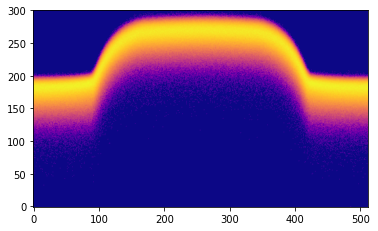

In [4]:
fig1 = fft_intensity_plot(samples, 1024, 2, 300, 'plasma')
fig1.savefig('fig1_qpsk_intensity.png', dpi=300, format='png')

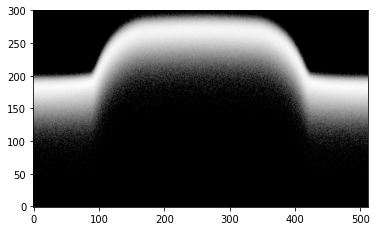

In [9]:
fig4 = fft_intensity_plot(samples, 1024, 2, 300, 'gray')

## Optional Waterfall Plot

In [8]:
#figure, axes = plt.subplots()
#axes.specgram(samples, NFFT=1024, Fs=2.048e6, noverlap=900, mode='magnitude', cmap='plasma')
#figure.savefig('fig_fall.png', dpi=300, format='png')